# Análise de Regressão Linear Múltipla com Sklearn

In [106]:
import numpy as np
import pandas as pd
# transform
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
# model
from sklearn.linear_model import LinearRegression
# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_validate
# graphics
import matplotlib.pyplot as plt
import seaborn as sns
# view all data frames collums
pd.set_option('display.max_columns', None)

### Carregando os Dados

In [107]:
complete_data_with_totalnet = pd.read_csv("data/integrated_processed_enem_anatel_ibge_2019.csv", encoding="latin_1")
complete_data_with_totalnet["densidade_total_internet_fixa"] = complete_data_with_totalnet[['fibra_optica', 'wifi', 'ethernet', 'lte',
                                                        'vsatelite', 'wimax', 'plc_eletrico', 'xdsl', 
                                                        'cable_modem', 'fwa_5g_fixed', 'atm_backbone',
                                                        'dth_satelite', 'hfc_tv_cabo', 'fr_frame_relay',
                                                        'mmds']].sum(axis=1)
complete_data_with_totalnet.sort_values(by="cod_municipio_ibge", inplace= True)
complete_data_with_totalnet = complete_data_with_totalnet[['cod_municipio_ibge', 'NO_MUNICIPIO_RESIDENCIA',
                                                          'UF', 'fibra_optica', 'wifi', 'ethernet', 'lte',
                                                          'vsatelite', 'wimax', 'plc_eletrico', 'xdsl', 
                                                          'cable_modem', 'fwa_5g_fixed', 'atm_backbone',
                                                          'dth_satelite', 'hfc_tv_cabo', 'fr_frame_relay',
                                                          'mmds', 'densidade_total_internet_fixa', 
                                                          'remuneracao_media', 'gini', 'pib', 
                                                          'pib_p_capta', 'media_idhm', 
                                                          'mean_grades_group_cities']]
complete_data_with_totalnet

,cod_municipio_ibge,NO_MUNICIPIO_RESIDENCIA,UF,fibra_optica,wifi,ethernet,lte,vsatelite,wimax,plc_eletrico,xdsl,cable_modem,fwa_5g_fixed,atm_backbone,dth_satelite,hfc_tv_cabo,fr_frame_relay,mmds,densidade_total_internet_fixa,remuneracao_media,gini,pib,pib_p_capta,media_idhm,mean_grades_group_cities
3852,1100015,Alta Floresta D'Oeste,RO,0,0,3,0,0,0,0,239,0,0,0,0,0,2,0,244,2030.28,0.472,4.956288e+08,21600.73,0.644038,493.009774
3853,1100023,Ariquemes,RO,0,0,47,0,0,0,0,0,0,8,0,0,0,3,0,58,2030.28,0.472,2.578830e+09,23908.38,0.644038,491.642412
3854,1100031,Cabixi,RO,3,129,2,0,3,0,0,75,0,0,0,0,0,0,0,212,2030.28,0.472,1.399594e+08,26347.78,0.644038,479.756641
3855,1100049,Cacoal,RO,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,6,2030.28,0.472,2.260644e+09,26483.95,0.644038,497.176007
3856,1100056,Cerejeiras,RO,0,0,0,0,0,0,0,644,0,0,0,0,0,4,0,648,2030.28,0.472,5.068545e+08,31051.55,0.644038,493.380822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,5222005,Vianópolis,GO,0,0,0,0,74,0,0,606,0,0,0,0,0,0,0,680,2019.95,0.460,4.836633e+08,34888.79,0.694984,500.626357
1125,5222054,Vicentinópolis,GO,0,0,0,0,0,0,0,120,0,0,0,0,0,2,0,122,2019.95,0.460,3.423556e+08,39157.68,0.694984,477.479032
1126,5222203,Vila Boa,GO,83,142,0,0,0,0,0,0,0,0,0,0,0,1,0,226,2019.95,0.460,1.136685e+08,18419.78,0.694984,456.444022
1127,5222302,Vila Propício,GO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019.95,0.460,2.069712e+08,35555.96,0.694984,468.682727


### Preparando o dataset para o procedimento de Regressão com a biblioteca Sklearn

#### Separando as variáveis numéricas em indepentes e dependentes considerando as densidades totais do acesso a internet

In [108]:
num_data_independent = complete_data_with_totalnet[['densidade_total_internet_fixa', 
                                                          'remuneracao_media', 'gini', 'pib', 
                                                          'pib_p_capta', 'media_idhm']]
num_data_label = complete_data_with_totalnet['mean_grades_group_cities']

#### Dividindo as n observações em 70% para treino e 30% para teste

In [109]:
x_train, x_test, y_train, y_test = train_test_split(num_data_independent, num_data_label, 
                                                    train_size= 0.75, random_state=42)

### Avaliação dos testes estatísticos T e F para o modelo

In [110]:
import statsmodels.formula.api as smf

In [111]:
smf.ols("mean_grades_group_cities ~ densidade_total_internet_fixa + remuneracao_media + gini + pib + pib_p_capta + media_idhm",
       data= complete_data_with_totalnet).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     mean_grades_group_cities   R-squared:                       0.505
Model:                                  OLS   Adj. R-squared:                  0.504
Method:                       Least Squares   F-statistic:                     945.1
Date:                      Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                              02:56:36   Log-Likelihood:                -23807.
No. Observations:                      5570   AIC:                         4.763e+04
Df Residuals:                          5563   BIC:                         4.767e+04
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       189.0613     10.013     18.882      0.000     169.432     208.691
densidade_total_internet_fixa     0.0002   2.41e-05      8.104      0.000       0.000       0.000
remuneracao_media                -0.0104      0.002     -6.097      0.000      -0.014      -0.007
gini                            105.1916      7.845     13.409      0.000      89.812     120.571
pib                            5.337e-11   1.98e-11      2.700      0.007    1.46e-11    9.21e-11
pib_p_capta                     7.04e-05   9.98e-06      7.052      0.000    5.08e-05       9e-05
media_idhm                      406.4941     15.741     25.824      0.000     375.636     437.352
==============================================================================
Omnibus:                       60.985   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.345
Skew:                          -0.042   Prob(JB):                     5.97e-23
Kurtosis:                       3.659   Cond. No.                     1.03e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Teste de Multicolinearidade através do Fator de Inflação da Variância - VIF

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [113]:
vif_data_frame = pd.DataFrame()

vif_data_frame["features"] = num_data_independent.columns
vif_data_frame["vif"] = [ vif(exog= num_data_independent.values, exog_idx= index) 
                        for index in range(num_data_independent.shape[1])]

vif_data_frame

,features,vif
0,densidade_total_internet_fixa,1.153629
1,remuneracao_media,100.287946
2,gini,0.721950
3,pib,1.171752
4,pib_p_capta,1.197431
5,media_idhm,369.330584


o teste vif acima indica elevado grau de multicolinearidade entre 
as variáveis media_ihm e remuneracao_media

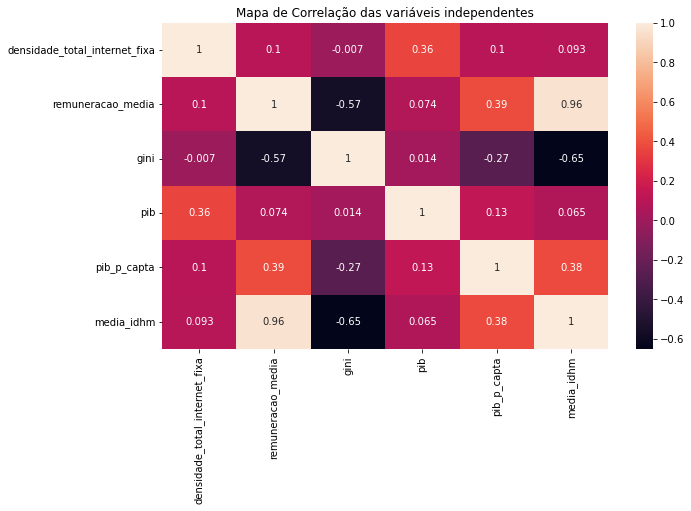

In [114]:
plt.figure(figsize=(10,6))
sns.heatmap(num_data_independent.corr(), annot= True)
plt.title("Mapa de Correlação das variáveis independentes")
plt.show()

#### Treinando o modelo

In [115]:
model_ols = LinearRegression()
model_ols.fit(x_train, y_train)

LinearRegression()

#### Predição do teste, y_hat

In [116]:
y_predicted = model_ols.predict(x_test)

#### Score R² - OLS

In [117]:
model_ols.score(x_test, y_test)

0.4963982456882995

#### Score RMSE - Raiz Quadrada do Erro Médio Quadrado

In [118]:
round(np.sqrt(mean_squared_error(y_true= y_test, y_pred= y_predicted)), 2)

17.68

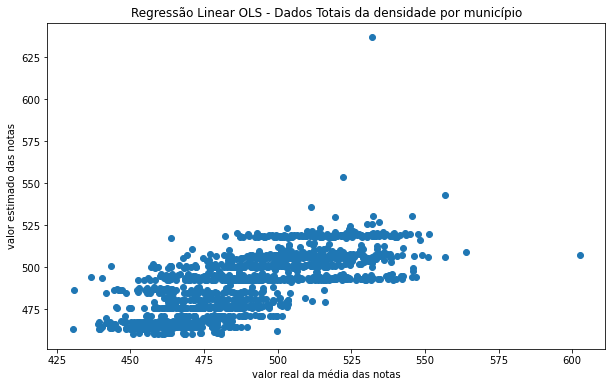

In [119]:
plt.figure(figsize=(10,6))
plt.scatter(x= y_test, y= y_predicted)
plt.title("Regressão Linear OLS - Dados Totais da densidade por município")
plt.xlabel("valor real da média das notas")
plt.ylabel("valor estimado das notas")
plt.show()

#### Coeficientes Betas da Regressão por municípios e o Intercepto

In [120]:
print(f" A equação do modelo OLS sem transformações para os dados de entrada:\n") 
print(f" mean_grades_mun= {round(model_ols.intercept_,3)} + {round(model_ols.coef_[0],3)}*internet + {round(model_ols.coef_[1],3)}*remuneracao + {round(model_ols.coef_[2],3)}*gini + {round(model_ols.coef_[3], 2)}*pib + {round(model_ols.coef_[4], 2)}*pib_capta + {round(model_ols.coef_[5], 2)}*idh")                               

 A equação do modelo OLS sem transformações para os dados de entrada:

 mean_grades_mun= 191.423 + 0.0*internet + -0.01*remuneracao + 104.437*gini + 0.0*pib + 0.0*pib_capta + 402.11*idh


### Grau de importância das variáveis do modelo OLS - sem transformação

In [121]:
ols_importance = pd.DataFrame({"coeficientes" : abs(model_ols.coef_.round(3))},
                              index= model_ols.feature_names_in_).sort_values(by= "coeficientes", 
                                                                              ascending=False)
ols_importance

,coeficientes
media_idhm,402.112
gini,104.437
remuneracao_media,0.010
densidade_total_internet_fixa,0.000
pib,0.000
pib_p_capta,0.000


Pelo fato da **remuneracao_media** ter uma representação de importância abaixo do esperado e tendo em vista 
que esta variável possui elevado índice de correlação pearson quando comparado com a variável **media_idhm** testaremos um novo modelo, com a supressão da variável "remuneracao_media".

### Treino e teste de um modelo com a supressão da variável remuneracao_media

In [122]:
num_data_independent = complete_data_with_totalnet[['densidade_total_internet_fixa', 'gini', 'pib', 
                                                          'pib_p_capta', 'media_idhm']]

#### Teste VIF de multicolinearidade com a supressão da variavel remuneracao_media

In [123]:
vif_data_frame = pd.DataFrame()

vif_data_frame["features"] = num_data_independent.columns
vif_data_frame["vif"] = [ vif(exog= num_data_independent.values, exog_idx= index) 
                        for index in range(num_data_independent.shape[1])]

vif_data_frame

,features,vif
0,densidade_total_internet_fixa,1.170130
1,gini,46.897356
2,pib,1.169618
3,pib_p_capta,2.268791
4,media_idhm,52.168655


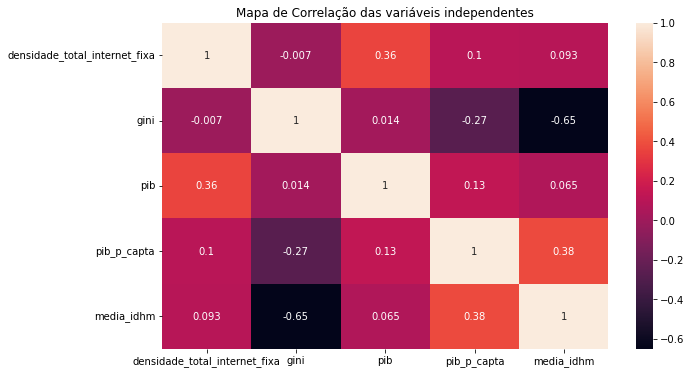

In [124]:
plt.figure(figsize=(10,6))
sns.heatmap(num_data_independent.corr(), annot= True)
plt.title("Mapa de Correlação das variáveis independentes")
plt.show()

Existe uma considerável correlação negativa entre as variáveis gini e media_idhm. Porém em valor bem abaixo quando comparado com a remuneracao_media, com o índice Rho Pearson acima de 0,95. 

#### Retreinamento do modelo linear com a Supressão da variável **remuneração_média**

In [125]:
x_train, x_test, y_train, y_test = train_test_split(num_data_independent, num_data_label, 
                                                    train_size= 0.75, random_state=42)
model_ols = LinearRegression()
model_ols.fit(x_train, y_train)
y_predicted = model_ols.predict(x_test)
print(f"O valor do Coeficiente de Regressão R²: {model_ols.score(x_test, y_test)}")
print(f"Raiz Quadrada o Erro Quadrático Médio: {round(np.sqrt(mean_squared_error(y_true= y_test, y_pred= y_predicted)), 2)}")

O valor do Coeficiente de Regressão R²: 0.4928128744805975
Raiz Quadrada o Erro Quadrático Médio: 17.74


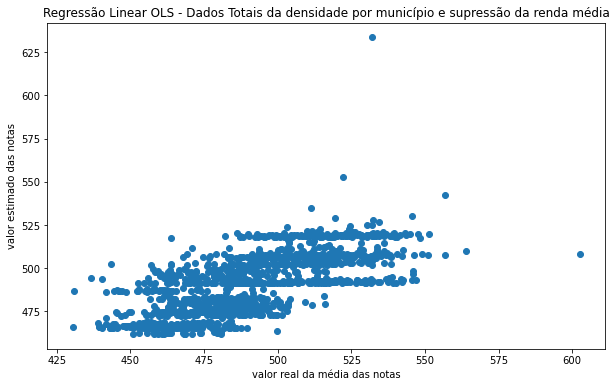

In [126]:
plt.figure(figsize=(10,6))
plt.scatter(x= y_test, y= y_predicted)
plt.title("Regressão Linear OLS - Dados Totais da densidade por município e supressão da renda média")
plt.xlabel("valor real da média das notas")
plt.ylabel("valor estimado das notas")
plt.show()

#### Grau de Importância das variáveis do modelo, após da supressão da variável "remuneracao_media"

In [127]:
ols_importance = pd.DataFrame({"coeficientes" : abs(model_ols.coef_.round(3))},
                              index= model_ols.feature_names_in_).sort_values(by= "coeficientes", 
                                                                              ascending=False)
ols_importance

,coeficientes
media_idhm,316.081
gini,92.029
densidade_total_internet_fixa,0.000
pib,0.000
pib_p_capta,0.000


#### Treino e validação do Modelo com Cross Validation para kfold = 5:

In [128]:
model_lm_cv = LinearRegression()
abs(np.mean(cross_val_score(model_lm_cv, X= num_data_independent, y= num_data_label, 
                            scoring= "neg_root_mean_squared_error", cv= 5)))

18.653611648077934

## Regressão Linear OLS com os Dados de acesso a internet agrupados por UF

### Agrupando os dados de acesso a internet por UF - Soma.

In [129]:
complete_data_with_totalnet

,cod_municipio_ibge,NO_MUNICIPIO_RESIDENCIA,UF,fibra_optica,wifi,ethernet,lte,vsatelite,wimax,plc_eletrico,xdsl,cable_modem,fwa_5g_fixed,atm_backbone,dth_satelite,hfc_tv_cabo,fr_frame_relay,mmds,densidade_total_internet_fixa,remuneracao_media,gini,pib,pib_p_capta,media_idhm,mean_grades_group_cities
3852,1100015,Alta Floresta D'Oeste,RO,0,0,3,0,0,0,0,239,0,0,0,0,0,2,0,244,2030.28,0.472,4.956288e+08,21600.73,0.644038,493.009774
3853,1100023,Ariquemes,RO,0,0,47,0,0,0,0,0,0,8,0,0,0,3,0,58,2030.28,0.472,2.578830e+09,23908.38,0.644038,491.642412
3854,1100031,Cabixi,RO,3,129,2,0,3,0,0,75,0,0,0,0,0,0,0,212,2030.28,0.472,1.399594e+08,26347.78,0.644038,479.756641
3855,1100049,Cacoal,RO,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,6,2030.28,0.472,2.260644e+09,26483.95,0.644038,497.176007
3856,1100056,Cerejeiras,RO,0,0,0,0,0,0,0,644,0,0,0,0,0,4,0,648,2030.28,0.472,5.068545e+08,31051.55,0.644038,493.380822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,5222005,Vianópolis,GO,0,0,0,0,74,0,0,606,0,0,0,0,0,0,0,680,2019.95,0.460,4.836633e+08,34888.79,0.694984,500.626357
1125,5222054,Vicentinópolis,GO,0,0,0,0,0,0,0,120,0,0,0,0,0,2,0,122,2019.95,0.460,3.423556e+08,39157.68,0.694984,477.479032
1126,5222203,Vila Boa,GO,83,142,0,0,0,0,0,0,0,0,0,0,0,1,0,226,2019.95,0.460,1.136685e+08,18419.78,0.694984,456.444022
1127,5222302,Vila Propício,GO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019.95,0.460,2.069712e+08,35555.96,0.694984,468.682727
